# ANOVA 

## Introduction

ANOVA (Analysis of Variance) is a method for generalizing statistical tests to multiple groups. As you'll see, ANOVA  analyses the overall variance of a dataset by partitioning the total sum of square of deviations (from the mean) into sum of squares for each of these groups and sum of squares for error. By comparing statistical test for multiple groups, it can serve as a useful alternative to the $t$-tests you've encountered thus far, when you wish to test multiple factors simultaneously.

## Objectives

You will be able to:
* Use ANOVA for testing multiple pairwise comparisons
* Understand and explain the methodology behind ANOVA tests

### Analysis of Variance:

- The main problem is: Can we determine whether a set of population means are the same or different from samples from these populations.

- Natural Question: Hint: What other test we were using for similar procedure - why can't we use the same (or modified version) here? (Let's count if we have 10 different population how many tests we should do in total?)

- Even if we were able to use above method, what happens to the significance levels?

The main idea: We will compare variances within the group with the total variance to be able to say that whether population means are equal or not.

__Wait!!__ Why use the variance to compare the means?

Let's check this from a scenerio!!

In [29]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [52]:
## case1

sample1 = np.random.normal(loc = 6, scale = 0.1, size = 20)

sample2 = np.random.normal(loc = 10, scale = 0.2, size = 20)

sample3 = np.random.normal(loc = 15, scale = 1, size = 20)

## case2

sample4 = np.random.normal(loc = 6, scale = 3, size = 20)
sample5 = np.random.normal(loc = 10, scale = 5, size = 20)
sample6 = np.random.normal(loc = 15, scale = 5, size = 20)

df = pd.DataFrame(data = [sample1, sample2, sample3, sample4, sample5, sample6]).T

df.head()

,0,1,2,3,4,5
0,5.946113,10.009569,13.895019,2.591494,8.053295,26.013101
1,5.979537,10.165336,14.821511,9.624792,5.675844,25.693339
2,5.969933,9.624532,16.905739,5.861885,6.841088,22.613534
3,6.204265,10.092091,14.638059,6.641199,15.322155,11.858086
4,6.129819,10.061412,14.613919,2.214064,13.238009,11.441394


In [53]:
df.rename(columns= {0:'s1', 1:'s2', 2:'s3', 3:'s4', 4:'s5', 5:'s6'}, inplace= True)

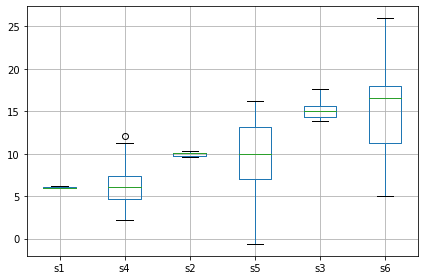

In [54]:
df.boxplot(column=['s1', 's4', 's2', 's5', 's3', 's6'])
plt.tight_layout()

In [55]:
print('Means of the samples are: ', sample1.mean(), 
      sample2.mean(),
      sample3.mean(), '\n',
      sample4.mean(),
      sample5.mean(),
      sample6.mean())

Means of the samples are:  6.0333515661519375 9.977185589141486 15.125885140335464 
 6.236780543543046 9.674109606820618 15.544048163600333


Note that here even though the variations of $\{s_1, s_2, s_3\}$ equals to the variations of the means in $\{s_4, s_5, s_6\}$ we can see this as a stronger evidence to argue that the population means are different in the first group.

__Summary__ ANOVA: comparison of the variance among the means of the populations to the variance among sample observations within the individual populations.

### Notation

- $t$: total number of populations

- $n_{i}$ number of observations within the sample $i$ drawn from the population $i$.

- $y_{ij}$: the measurement for the $j$th observation from the $i$th sample.

- $\mu_{i}$ is the mean for the $i$th population.

__observations__

$n = \sum\limits_{i} n_{i}$ is the total number of observations

### Hypotheses

-  $H_{0}: \mu_{1} = \mu_{2} = \cdots = \mu_{t}$ 

- $H_{a}$: at least one of the equality is not satisfied


In [56]:
from scipy.stats import f


In [57]:
f_dist = np.random.f(1, 20, size = 30)


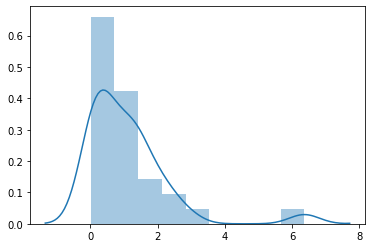

In [58]:
sns.distplot(f_dist, )


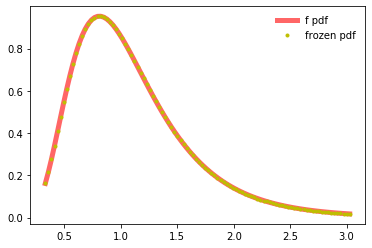

In [59]:
fig, ax = plt.subplots(1, 1)
dfn, dfd = 19,19


x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)

ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'y.', lw=2, label='frozen pdf')

ax.legend(loc='best', frameon=False)


In [60]:
sampling_variance = []
for i in range(1000):
    x1 = np.random.normal(10,2, 4)
    sampling_variance.append(x1.var(ddof = 1))
    

In [61]:
sampling_variance2 = []

for j in range(1000):
    x2 = np.random.normal(20, 2 , 20)
    sampling_variance2.append(x2.var(ddof =1))

In [62]:
f_score = [ a/b for a, b in zip(sampling_variance, sampling_variance2)]

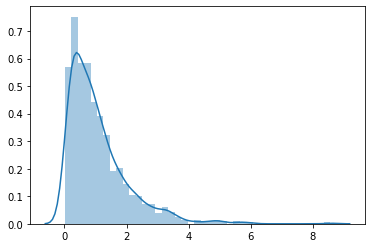

In [63]:
sns.distplot(f_score)

In [64]:
## let's create a data set first


## sample sizes for different groups
n1 =20
n2=20
n3 =20
n4 = 20

## number of groups
t = 4

In [65]:
np.random.seed(100719)

x1 = np.random.normal(loc = 950, scale = 100, size = n1)

x2 = np.random.normal(loc = 928, scale = np.sqrt(3800), size = n2)

x3 = np.random.normal(loc = 938, scale = np.sqrt(13617), size = n3)

x4 = np.random.normal(loc = 1116, scale = np.sqrt(23000), size = n4)

df = pd.DataFrame(data = np.stack([x1, x2,x3,x4], axis = 1), columns= ['s1', 's2', 's3', 's4'],
                  index = np.arange(1, len(x2)+1))

In [66]:
df.head()

,s1,s2,s3,s4
1,963.159649,1037.363682,851.267259,1264.022024
2,887.333547,1025.494921,795.961651,1358.262833
3,899.160390,1074.529538,822.607877,921.605929
4,920.547292,915.226366,921.905885,1327.048233
5,914.597269,956.353039,1080.041006,1234.766840


## Hypothesis

$H_{0}$: $\mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$

$H_{a}$: not all means are equal.

For more details on how to construct hypotheses testing with ANOVA model please check:

[Penn State - The 7 Step Process of Statistical Hypothesis Testing](https://newonlinecourses.science.psu.edu/stat502/lesson/1/1.2)







In [67]:
## Let's find these quantities with Python

all_data = np.stack([x1, x2,x3,x4], axis = 1)
overall_mean = all_data.mean()

In [68]:
## Note that all_data is a (20,4) numpy_ndarray
ss_total = ((all_data - overall_mean)**2).sum()

## Function that calculates between group error
def ss_between_groups(sample_list):
    X_bar = np.stack(sample_list, axis=1).mean()
    terms = [len(sample)*(sample.mean() - X_bar)**2 for sample in sample_list]
    return np.sum(terms)
print(ss_between_groups([x1, x2, x3, x4]))

554712.4606001556


In [69]:
## Note that right now we can find the error within the groups
## by simply subtracting ss_between_groups from ss_total

ss_within = ss_total - ss_between_groups([x1, x2, x3, x4])

print(ss_within)

1043475.4297664801


In [48]:
## Or we can apply the formula:
## A function that calculates within group error
def ss_within_groups(sample_list):
    terms = [(sample - sample.mean())**2 for sample in sample_list]
    return np.sum(terms)

In [70]:
print(dfn, dfd)

19 19


In [71]:
print('Within Group Error', ss_within_groups([x1, x2, x3, x4]))
print('Between Group Error', ss_between_groups([x1, x2, x3, x4]))
print('Mean Squared Error', ss_between_groups([x1, x2, x3, x4])/dfn)
print('Mean Squared Error', ss_within_groups([x1, x2, x3, x4])/ dfd)

Within Group Error 1043475.4297664786
Between Group Error 554712.4606001556
Mean Squared Error 29195.392663166087
Mean Squared Error 54919.75946139361


In [72]:
## Degrees of freedom of numerator
dfn = len([x1, x2, x3, x4]) - 1

## Degree of freedom of denominator
dfd = n1+n2+n3+n4 - len([x1, x2, x3,x4])

MSE_between_groups = ss_between_groups([x1, x2, x3, x4])/dfn
MSE_within_groups = ss_within_groups([x1, x2, x3, x4])/ dfd

print(MSE_between_groups)
print(MSE_within_groups)

## F_score comes from the ratio
F_score = MSE_between_groups/ MSE_within_groups
print(F_score)

184904.15353338522
13729.939865348402
13.467222387480808


In [73]:
## Or we can apply directly scipy.stats's f_oneway method 

import scipy.stats
scipy.stats.f_oneway(x1,x2,x3,x4)

F_onewayResult(statistic=13.46722238748083, pvalue=3.9030691818738904e-07)

For more details about the notation and formulas please check:

[Penn State](https://newonlinecourses.science.psu.edu/stat502/lesson/2/2.2)